In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import gdown

# Завантаження даних із Google Drive
url = 'https://drive.google.com/uc?id=1UBBRY_uFUoJwQsBbYUMcfOXZZxETt_LR'
output = 'rent_data.csv'
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1UBBRY_uFUoJwQsBbYUMcfOXZZxETt_LR
To: /content/rent_data.csv
100%|██████████| 567k/567k [00:00<00:00, 11.0MB/s]


#Частина 1: Аналіз та підготовка даних

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

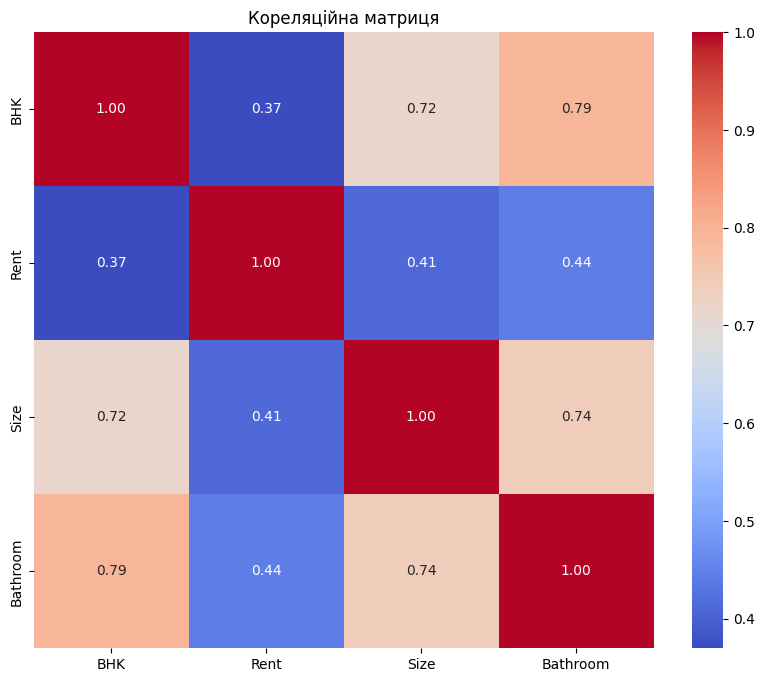

Нечислові колонки: Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')


In [3]:
# Перегляд перших рядків даних
print(data.head())

# Інформація про дані
print(data.info())

# Загальна кількість пропущених значень до обробки
total_missing_before = data.isnull().sum().sum()
print(f"Загальна кількість пропущених значень до обробки: {total_missing_before}")

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].mean())

numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Кореляційна матриця
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

# Масштабування числових змінних
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Видалення або перетворення нечислових змінних
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
print(f"Нечислові колонки: {non_numeric_columns}")

# Видалення колонки з даними
data = data.drop(columns=non_numeric_columns)

#Частина 2: Моделювання

In [4]:
X = data.drop('Rent', axis=1)
y = data['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель 1: Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Модель 2: Випадковий ліс
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Метрики для обох моделей
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Оцінка моделей
evaluate_model(y_test, y_pred_lr, "Лінійна регресія")
evaluate_model(y_test, y_pred_rf, "Випадковий ліс")

Лінійна регресія - MAE: 0.34, RMSE: 0.65
Випадковий ліс - MAE: 0.26, RMSE: 0.70


#Частина 3: Аналіз результатів

<ipython-input-5-3c6852e76ade>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='red')


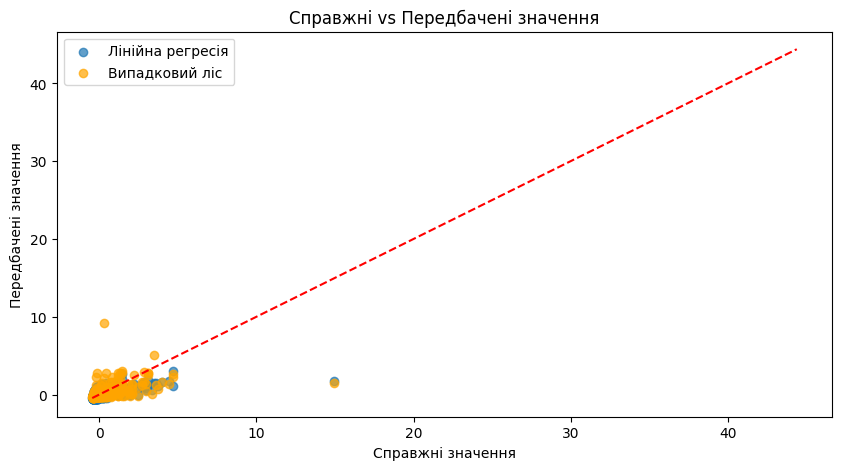

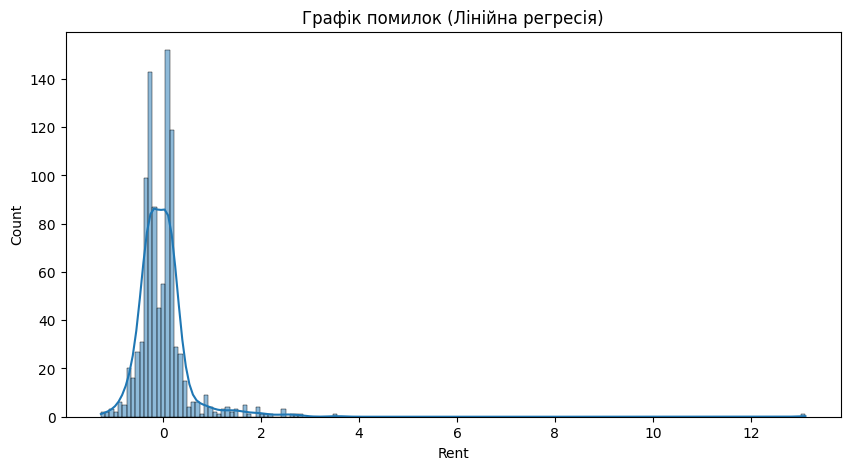

Висновки:
1. Випадковий ліс демонструє меншу помилку, ніж лінійна регресія.
2. Помилки найбільші для високих значень оренди.


In [5]:
# Порівняння справжніх і передбачених значень
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Лінійна регресія')
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Випадковий ліс', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='red')
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.legend()
plt.title('Справжні vs Передбачені значення')
plt.show()

# Графік помилок для лінійної регресії
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 5))
sns.histplot(residuals_lr, kde=True)
plt.title('Графік помилок (Лінійна регресія)')
plt.show()